### Homework 5 - Santiago Tabares
**1036666894**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [56]:
df = pd.read_csv("mnist_test.csv",sep=',') #reading data 
print("The size of the dataset is: ",df.shape)
df.head(10)

The size of the dataset is:  (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualize digits

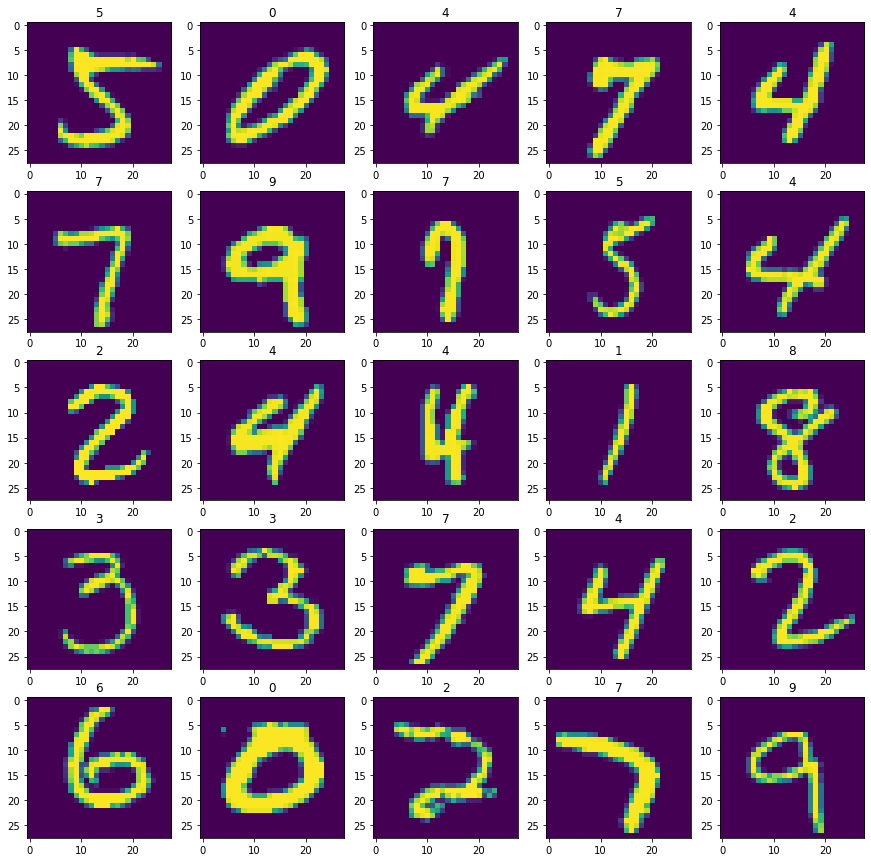

In [41]:
random_digits = np.random.randint(len(df['label'].unique()), size=25) #random selection 
fig, ax = plt.subplots(5,5,figsize=(15,15)) # make a figure 

j = 0 
k = 0
for i in random_digits:
    
    
        
    digit = df[df['label'] == i].drop(['label'],axis=1).reset_index(drop=True) 

    img = digit.iloc[np.random.randint(digit.shape[0])].to_numpy().reshape(28,28)

    ax[j,k].imshow(img,aspect='auto')
    ax[j,k].set_title('{}'.format(i))
    
    k += 1
    if k == 5:
        k = 0
        j += 1

## Split Data in Train and Test

In [61]:
X_data = df.drop(['label'], axis=1).to_numpy() # features into numpy arrays 
y_data = df[['label']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # Split the data 


In [62]:
logreg = LogisticRegression() # logistic regression model
logreg.fit(X_train, y_train.ravel()) # fit with train data 

print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.3f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.3f}')

Accuracy of Logistic regression classifier on training set: 0.995
Accuracy of Logistic regression classifier on test set: 0.875


C:\Users\taba-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
X_test.shape

(2000, 784)

In [65]:
np.random.randint(1,2000,size = 12)

array([ 638, 1963, 1224,  703, 1285,   54,   32, 1343, 1325,  307,  502,
         73])

## Predict some digits

In [69]:
np.argmax(logreg.predict_proba([X_test[i]])[0])
logreg.predict_proba([X_test[i]])[0]

array([2.68503565e-68, 1.00000000e+00, 2.33275103e-11, 1.09725149e-13,
       9.97065817e-23, 4.89340583e-24, 7.75728694e-26, 4.05471956e-13,
       1.67162204e-11, 5.47061734e-19])

In [72]:
test_digits = np.random.randint(1,2000,size = 12)

for i in test_digits:
    d0, d1, d2, d3, d4, d5,d6, d7, d8, d9 = logreg.predict_proba([X_test[i]])[0]
    max_value = np.argmax(logreg.predict_proba([X_test[i]])[0])

    print("\nProbability of prediction of each digit of the model")
    print('\n0: ', d0, "\n1:",d1,"\n2:", d2,"\n3:", d3,"\n4:", d4,"\n5:", d5,"\n6:",d6,"\n7:", d7,"\n8:", d8,"\n9:", d9)
    
    print("\nThe digit with greater probability predicted with the model is: ",max_value)

    print("\nTrue value: ",y_test[i][0])
    print("-----------------------------------------------------")


Probability of prediction of each digit of the model

0:  3.1236625500560755e-41 
1: 2.962176001171859e-36 
2: 1.824570465061104e-26 
3: 2.466967577441626e-30 
4: 3.526254227209763e-44 
5: 2.061680196666602e-19 
6: 1.0 
7: 1.433771094311761e-79 
8: 1.1580807074442446e-26 
9: 3.173784413910052e-50

The digit with greater probability predicted with the model is:  6

True value:  6
-----------------------------------------------------

Probability of prediction of each digit of the model

0:  1.4655616557608996e-58 
1: 5.982648283057306e-39 
2: 2.1140196313816044e-08 
3: 5.526996623961846e-24 
4: 3.3461199836764247e-25 
5: 2.5162622399764322e-21 
6: 0.9999999788598037 
7: 5.269248530701899e-34 
8: 6.172060323695482e-19 
9: 1.0479528788893576e-28

The digit with greater probability predicted with the model is:  6

True value:  6
-----------------------------------------------------

Probability of prediction of each digit of the model

0:  6.557476822431063e-22 
1: 8.032354016549329e-58 


The model work very well, we can see that in the accuracy on the training dataset and testing dataset. 
We can see at the end the probabilities in each case, the model gives a probability to each digit and we must pick the greater one.